In [2]:
import pandas as pd
df = pd.read_csv("organised_Gen.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  496774 non-null  int64  
 1   YEAR                        496774 non-null  int64  
 2   MONTH                       496774 non-null  int64  
 3   STATE                       496774 non-null  object 
 4   TYPE OF PRODUCER            496774 non-null  object 
 5   ENERGY SOURCE               496774 non-null  object 
 6   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 26.5+ MB


In [4]:
df.head()

,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [5]:
df.isna().sum()

Unnamed: 0                    0
YEAR                          0
MONTH                         0
STATE                         0
TYPE OF PRODUCER              0
ENERGY SOURCE                 0
GENERATION (Megawatthours)    0
dtype: int64

In [6]:
df = df.dropna(axis=0)

In [18]:
import plotly.express as px
data = df.loc[(df['STATE'] == 'US-TOTAL') & (df['ENERGY SOURCE'] == 'Wind')].groupby(['YEAR'], as_index=False).sum()[:-1]
fig = px.bar(data, x='YEAR', y='GENERATION (Megawatthours)', color='GENERATION (Megawatthours)')
fig.update_layout(
    title={
        "text": "Производство электроэнергии с помощью ветра в США 2001-2021",
        "x": 0.5,
        "font": {
            "size": 20,
        },
    }
)

fig.update_xaxes(
    tickangle=-90,
    title={
        'text': 'Год',
        'font': {
            'size': 16,
        },
    },
    dtick=1,
    tickfont={
        'size': 14,
    },
)
fig.update_yaxes(
    title={
        'text': 'Мегаватт-час',
        'font': {
            "size": 16,
        },
    },
    tickfont={
        'size': 14,
    },
    dtick = 66_666_666.6, # 100M / 1.5
    tick0 = data['GENERATION (Megawatthours)'].min() * 0.9
)
fig.update_layout(coloraxis_colorbar=dict(
    title='Мегаватт-час',
))
fig.show()

In [27]:
import plotly.express as px

data = df.loc[(df['STATE'] == 'US-TOTAL') & (df['ENERGY SOURCE'] == 'Wind')].groupby(['YEAR'], as_index=False).sum()[:-1]
fig = px.pie(data, values='GENERATION (Megawatthours)', names='YEAR')
fig.update_layout(
    title={
        "text": "Производство электроэнергии с помощью ветра в США 2001-2021",
        "x": 0.5,
        "font": {
            "size": 20,
        },
    }
)
fig.show()

In [49]:
import plotly.express as px

data = df.loc[(df['STATE'] == 'US-TOTAL') & (df['ENERGY SOURCE'] == 'Wind')].groupby(['YEAR'], as_index=False).sum()[:-1]
fig = px.line(data, x="YEAR", y="GENERATION (Megawatthours)", markers=True)
fig.update_traces(line_color='crimson', marker=dict(color="darkblue", line=dict(color='black', width=1)), showlegend=True, name='Мегаватт-час')
fig.update_layout(
    title={
        "text": "Производство электроэнергии с помощью ветра в США 2001-2021",
        "x": 0.5,
        "font": {
            "size": 20,
        },
    },
    legend_x=0, 
    legend_y=0,
)

fig.update_xaxes(
    tickangle=-90,
    title={
        'text': 'Год',
        'font': {
            'size': 16,
        },
    },
    dtick=1,
    tickfont={
        'size': 14,
    },
    gridcolor='azure',
)
fig.update_yaxes(
    title={
        'text': 'Мегаватт-час',
        'font': {
            "size": 16,
        },
    },
    tickfont={
        'size': 14,
    },
    dtick = 66_666_666.6, # 100M / 1.5
    tick0 = data['GENERATION (Megawatthours)'].min() * 0.9,
    gridcolor='azure',
)
fig.show()

In [53]:
import plotly.express as px

data = df.loc[(df['STATE'] == 'US-TOTAL') & (df['ENERGY SOURCE'] == 'Wind')].groupby(['YEAR'], as_index=False).sum()[:-1]
fig = px.box(data, y="GENERATION (Megawatthours)")
fig.update_layout(
    title={
        "text": "Производство электроэнергии с помощью ветра в США 2001-2021",
        "x": 0.5,
        "font": {
            "size": 20,
        },
    }
)

fig.update_yaxes(
    title={
        'text': 'Мегаватт-час',
        'font': {
            "size": 16,
        },
    },
    tickfont={
        'size': 14,
    },
    dtick = 66_666_666.6, # 100M / 1.5
    tick0 = data['GENERATION (Megawatthours)'].min() * 0.9
)
fig.show()

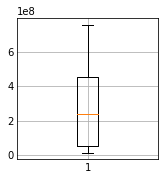

In [74]:
import matplotlib.pyplot as plt

data = df.loc[(df['STATE'] == 'US-TOTAL') & (df['ENERGY SOURCE'] == 'Wind')].groupby(['YEAR'], as_index=False).sum()[:-1]
x = data['YEAR']
y = data['GENERATION (Megawatthours)']

fig, ax = plt.subplots()

# plt.inferno()
# ax.bar(x, y)
# plt.colorbar()
ax.boxplot(data=data, x=data['GENERATION (Megawatthours)'])

plt.show()